# Data Mining 

In this notebook, I do visualization and analysation for parameters and modeling as a Regression as well

### Foundation for Data Science and Machine Leaning ( install modules )

In [61]:
# Base
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # unless a version will be changed, ignore a message of errors
warnings.simplefilter(action='ignore', category=FutureWarning)

# Preprocessing and Accuracy evaluation
# ------------------------------
from sklearn.preprocessing import MinMaxScaler # Scaling between min and max(Normalization)
from sklearn.preprocessing import StandardScaler # Scaling μ=0, σ=1 (Standardization)
from sklearn.model_selection import train_test_split # split datasets
from sklearn.model_selection import GridSearchCV # Optimize Hyper Params
from sklearn.model_selection import KFold # Cross-validation
from sklearn.metrics import mean_squared_error as MSE # MSE:Mean Squared Error
from sklearn.metrics import mean_absolute_error as MAE # MAE:Mean Absolute Error
from sklearn.metrics import r2_score # R2 Score:Coefficient of Determination(0~1) 1:Overfitting
from scipy.stats import norm # calculate a PDF(probability density function) of normal distribution
from scipy import stats # Calculate Cox-Box
import itertools # DoE using Full Factorial Design
#from skopt import BayesSearchCV
#import shap # explainations of model (Shapley Additive Explanations)

# from sklearn.decomposition import PCA # Dimensional Compression (Don't need it because not many feature to use)
# from sklearn.cluster import KMeans # Clustering (Classification)

# Machine Leaning Models
# ------------------------------
# Non Tree Model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Import Data

import a excel file and show head of 5 lows

data details:

    Model          : Model name (Exp.FWD020_Stat_Feb2022_V0 → FWD020:a panel of production type, V0:No.0 coupon)
    t_L1      [mm] : Thickness of Copper Layer 1
    t_D12     [mm] : Thickness of Dielectric Layer between Copper Layer 1 and Copper Layer 2
    t_L2      [mm] : Thickness of Copper Layer 2
    t_R2      [mm] : ??
    t_Core    [mm] : Thickness of Core
    Dia_1     [mm] : Diameter of via hole 1
    Dia_2~Dia_9 : Same way to think
    VS_x1     [mm] : Alignment of x direction as a via hole 1
    VS_y1     [mm] : Alignment of y direction as a via hole 1
    VS_x2~VS_y9 : Same way to think
    Resistance[μΩ] : Resistance

In [2]:
# Import
df_original = pd.read_excel('2022_02_DoE.xlsx')

df_original.head()

,Model,t_L1,t_D12,t_L2,t_R2,t_Core,Dia_1,Dia_2,Dia_3,Dia_4,...,VS_y5,VS_x6,VS_y6,VS_x7,VSy7,VS_x8,VS_y8,VS_x9,VS_y9,Resistance
0,FWD020_Stat_Feb2022_V0,0.0278,0.0603,0.0161,0.0161,0.0509,0.0939,0.0973,0.0930,0.0955,...,0.0094,0.0063,-0.0099,-0.0171,-0.0236,0.0231,-0.0078,0.0029,0.0011,461.690341
1,FWD020_Stat_Feb2022_V1,0.0282,0.0598,0.0156,0.0156,0.0485,0.0907,0.1005,0.0971,0.0965,...,-0.0003,0.0233,-0.0035,-0.0158,-0.0016,0.0116,-0.0012,0.0144,0.0198,290.925101
2,FWD020_Stat_Feb2022_V2,0.0279,0.0618,0.0160,0.0160,0.0476,0.0933,0.1005,0.0994,0.0930,...,0.0118,-0.0174,-0.0071,-0.0103,-0.0116,-0.0115,0.0127,0.0247,-0.0232,355.128861
3,FWD020_Stat_Feb2022_V3,0.0276,0.0591,0.0163,0.0163,0.0490,0.0969,0.0976,0.0963,0.1005,...,0.0202,-0.0094,0.0184,-0.0013,-0.0187,0.0028,0.0078,0.0201,-0.0047,395.107634
4,FWD020_Stat_Feb2022_V4,0.0277,0.0587,0.0163,0.0163,0.0487,0.0945,0.0912,0.0916,0.0996,...,0.0004,0.0089,-0.0127,0.0008,-0.0007,-0.0112,-0.0026,-0.0082,0.0091,345.484558


### Data Exploration

Investigate a shape of dataframe

    (2000, 34) : 2000 Lows and 34 Columns(index No.0-33)

In [3]:
df_original.shape

(2000, 34)

Investigate  infomation

    Non-Null Coun : the number of non missing data > no missing data in all columns
    
    '''
    df_original.isnull().sum()
    '''
    
    Dtype : Data types > without Model, all are float so don't need to change data type like using One-Hot-Vector

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Model       2000 non-null   object 
 1   t_L1        2000 non-null   float64
 2   t_D12       2000 non-null   float64
 3   t_L2        2000 non-null   float64
 4   t_R2        2000 non-null   float64
 5   t_Core      2000 non-null   float64
 6   Dia_1       2000 non-null   float64
 7   Dia_2       2000 non-null   float64
 8   Dia_3       2000 non-null   float64
 9   Dia_4       2000 non-null   float64
 10  Dia_5       2000 non-null   float64
 11  Dia_6       2000 non-null   float64
 12  Dia_7       2000 non-null   float64
 13  Dia_8       2000 non-null   float64
 14  Dia_9       2000 non-null   float64
 15  VS_x1       2000 non-null   float64
 16  VS_y1       2000 non-null   float64
 17  VS_x2       2000 non-null   float64
 18  VS_y2       2000 non-null   float64
 19  VS_x3       2000 non-null  

Investigate each feature of data (dtype : int, float)

    count : The number of data(index)
    
    mean : Average
    
    std : Standard Deviation
    
    min : minimum
    
    25% : first quartile
    
    50% : Median
    
    75% : third quartile
    
    max : maximum

In [5]:
df_original.describe()

,t_L1,t_D12,t_L2,t_R2,t_Core,Dia_1,Dia_2,Dia_3,Dia_4,Dia_5,...,VS_y5,VS_x6,VS_y6,VS_x7,VSy7,VS_x8,VS_y8,VS_x9,VS_y9,Resistance
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.027993,0.059985,0.015997,0.015997,0.050029,0.095433,0.095472,0.095439,0.09537,0.095524,...,-0.000036,-0.000363,0.000206,-0.000101,0.000090,0.000273,0.000130,-0.000464,-0.000588,382.855133
std,0.000296,0.001734,0.000294,0.000294,0.001723,0.002880,0.002910,0.002844,0.00288,0.002842,...,0.014455,0.014403,0.014307,0.014411,0.014413,0.014285,0.014494,0.014389,0.014478,66.225571
min,0.027500,0.057000,0.015500,0.015500,0.047000,0.090500,0.090500,0.090500,0.09050,0.090500,...,-0.025000,-0.025000,-0.025000,-0.025000,-0.025000,-0.025000,-0.025000,-0.025000,-0.025000,235.349740
25%,0.027700,0.058500,0.015700,0.015700,0.048600,0.092900,0.093000,0.093000,0.09290,0.093100,...,-0.012425,-0.012725,-0.012200,-0.012325,-0.012800,-0.011900,-0.012900,-0.012900,-0.013400,331.937435
50%,0.028000,0.060000,0.016000,0.016000,0.050100,0.095400,0.095500,0.095400,0.09530,0.095500,...,-0.000050,-0.000050,0.000200,-0.000300,0.000000,0.000600,0.000000,-0.000500,-0.000550,382.041324
75%,0.028200,0.061500,0.016300,0.016300,0.051500,0.097900,0.098000,0.097900,0.09780,0.098000,...,0.012100,0.011900,0.012300,0.012000,0.012700,0.013000,0.012900,0.011925,0.012200,430.008603
max,0.028500,0.063000,0.016500,0.016500,0.053000,0.100500,0.100500,0.100500,0.10050,0.100500,...,0.025000,0.024900,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,603.692019


Investigate each feature of data (dtype : Object)

    From the result, I'm sure there is nothing two or more dub names(All are unique)

In [6]:
df_original['Model'].describe(include='all')

count                        2000
unique                       2000
top        FWD020_Stat_Feb2022_V0
freq                            1
Name: Model, dtype: object

Investigate whether 't_L2' and 't_R2' are completely same or not

    completely same > ask for a person who is in charge of doing simulation and if it doesn't need, will deliete it
    
    Maybe it is real data to need to use, it would be a strang feature

In [7]:
equal_result = df_original['t_L2'].equals(df_original['t_R2'])
if equal_result:
    print('completely same')
else:
    print('identifical values')

completely same


### Visualization

boxplot

    Visualization of range for the dataframe (df_original.describe())

In [8]:
print(','.join(df_original.columns)) # get names of columns

Model,t_L1,t_D12,t_L2,t_R2,t_Core,Dia_1,Dia_2,Dia_3,Dia_4,Dia_5,Dia_6,Dia_7,Dia_8,Dia_9,VS_x1,VS_y1,VS_x2,VS_y2,VS_x3,VS_y3,VS_x4,VS_y4,VS_x5,VS_y5,VS_x6,VS_y6,VS_x7,VSy7,VS_x8,VS_y8,VS_x9,VS_y9,Resistance


At first,

    check boxplot of dataframe without Resistance because it is different range of y-axis and different unit.
    
    so investigate lengths [mm]
        
        - Copper Layers have small range
        
        - Copper Layer 1 > Copper Layer 2
        
        - Dielecreic Layer is the most thickness in thickness ( > thickness of Core )
        
        - Diameter and Alignment of x-y direction look almost same range of width
        
            - I should check them for each set of parameters

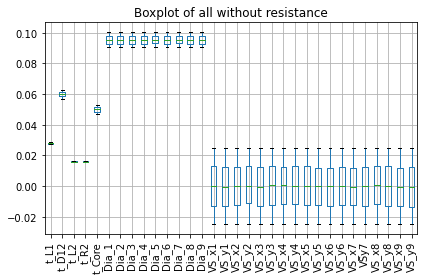

In [9]:
# Make a dataframe without Resistance
df_without_resistance = df_original.drop(columns=['Resistance'])

# make figures as a same range of number for y-axis
df_without_resistance.boxplot(rot=90) # 90-degree rotation for x-axis 
plt.title("Boxplot of all without resistance")
plt.tight_layout()

thickness of Copper Layers

    - check them as a same y-axis range to compare to shapes of figures

        - t_L1 > t_L2

            about 1.75 times

        - t_L1

            median line is located at a bit upper position than center - check later

        - t_L2

            almost symmetrical shape

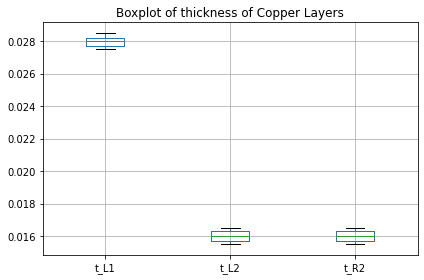

In [10]:
# Make a dataframe of thickness of Copper Layers
df_thickness_copperlayer = df_original.drop(columns=['Model','t_D12','t_Core','Dia_1','Dia_2','Dia_3','Dia_4','Dia_5','Dia_6','Dia_7','Dia_8','Dia_9','VS_x1','VS_y1','VS_x2','VS_y2','VS_x3','VS_y3','VS_x4','VS_y4','VS_x5','VS_y5','VS_x6','VS_y6','VS_x7','VSy7','VS_x8','VS_y8','VS_x9','VS_y9','Resistance'])

# make figures as a same range of number for y-axis
df_thickness_copperlayer.boxplot()
plt.title("Boxplot of thickness of Copper Layers")
plt.tight_layout()

    - check them as a different y-axis range (subplots) to compare to shapes of each figures
    
        - t_L1
        
            because maximam data is a little upper side, median line is upper position

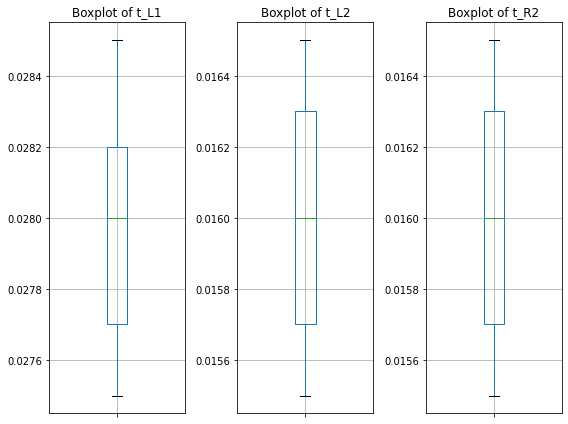

In [11]:
# make figures as different ranges of number for y-axis
fig, axes = plt.subplots(nrows=1, ncols=len(df_thickness_copperlayer.columns),figsize=(8,6)) # (1,3) arrange of figures

for i, column in enumerate(df_thickness_copperlayer.columns):
    df_thickness_copperlayer.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}") # put titles for each figue
    axes[i].set_xticklabels([]) # Hide x-axis labels 
plt.tight_layout()

Investigate range of each Copper Layers

    Completly same > a bit strange? min is different so only the range is same

In [12]:
range_tL1 = df_thickness_copperlayer['t_L1'].max()-df_thickness_copperlayer['t_L1'].min()
range_tL2 = df_thickness_copperlayer['t_L2'].max()-df_thickness_copperlayer['t_L2'].min()
print('Copper Layer 1 thickness')
print('range :', range_tL1,'mm')
print('min : ',df_thickness_copperlayer['t_L1'].min(),'mm')

print()
print('Copper Layer 2 thickness')
print('range : ',range_tL2,'mm')
print('min : ',df_thickness_copperlayer['t_L2'].min(),'mm')

Copper Layer 1 thickness
range : 0.0010000000000000009 mm
min :  0.0275 mm

Copper Layer 2 thickness
range :  0.0010000000000000009 mm
min :  0.0155 mm


thickness of Dielectric Layers

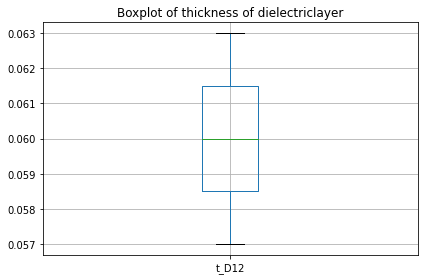

In [13]:
# Make a dataframe of thickness of each parameters
df_thickness_dielectriclayer = df_original.drop(columns=['Model','t_L1','t_L2','t_R2','t_Core','Dia_1','Dia_2','Dia_3','Dia_4','Dia_5','Dia_6','Dia_7','Dia_8','Dia_9','VS_x1','VS_y1','VS_x2','VS_y2','VS_x3','VS_y3','VS_x4','VS_y4','VS_x5','VS_y5','VS_x6','VS_y6','VS_x7','VSy7','VS_x8','VS_y8','VS_x9','VS_y9','Resistance'])

# make figure
df_thickness_dielectriclayer.boxplot()
plt.title("Boxplot of thickness of dielectriclayer")
plt.tight_layout()

thickness of Core

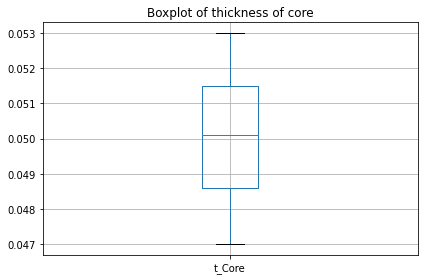

In [14]:
# Make a dataframe of thickness of each parameters
df_thickness_core = df_original.drop(columns=['Model','t_L1','t_L2','t_R2','t_D12','Dia_1','Dia_2','Dia_3','Dia_4','Dia_5','Dia_6','Dia_7','Dia_8','Dia_9','VS_x1','VS_y1','VS_x2','VS_y2','VS_x3','VS_y3','VS_x4','VS_y4','VS_x5','VS_y5','VS_x6','VS_y6','VS_x7','VSy7','VS_x8','VS_y8','VS_x9','VS_y9','Resistance'])

# make figure
df_thickness_core.boxplot()
plt.title("Boxplot of thickness of core")
plt.tight_layout()

width of Diameter

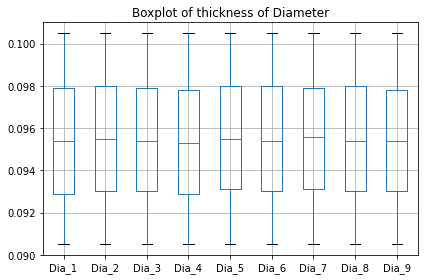

In [15]:
# Make a dataframe of Diameter of each parameters
df_width_Diameter = df_original.drop(columns=['Model','t_L1','t_D12','t_L2','t_R2','t_Core','VS_x1','VS_y1','VS_x2','VS_y2','VS_x3','VS_y3','VS_x4','VS_y4','VS_x5','VS_y5','VS_x6','VS_y6','VS_x7','VSy7','VS_x8','VS_y8','VS_x9','VS_y9','Resistance'])

# make figures
df_width_Diameter.boxplot()
plt.title("Boxplot of thickness of Diameter")
plt.tight_layout()

width of Alignment

    - x-y Alignment

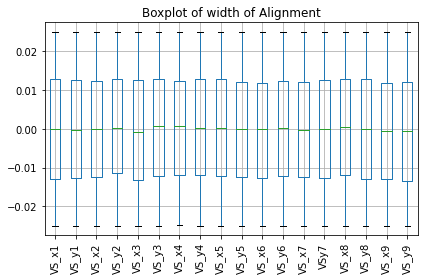

In [16]:
# Make a dataframe of Alignment of each parameters
df_width_Alignment = df_original.drop(columns=['Model','t_L1','t_D12','t_L2','t_R2','t_Core','Dia_1','Dia_2','Dia_3','Dia_4','Dia_5','Dia_6','Dia_7','Dia_8','Dia_9','Resistance'])

# make figures
df_width_Alignment.boxplot(rot=90)
plt.title("Boxplot of width of Alignment")
plt.tight_layout()

    - x Alignment

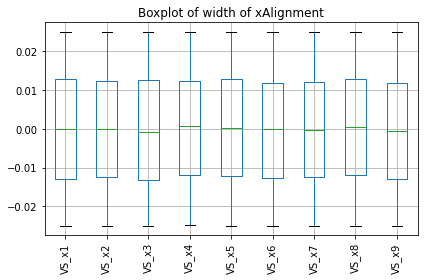

In [17]:
# Make a dataframe of xAlignment of each parameters
df_width_xAlignment = df_original.drop(columns=['Model','t_L1','t_D12','t_L2','t_R2','t_Core','Dia_1','Dia_2','Dia_3','Dia_4','Dia_5','Dia_6','Dia_7','Dia_8','Dia_9','VS_y1','VS_y2','VS_y3','VS_y4','VS_y5','VS_y6','VSy7','VS_y8','VS_y9','Resistance'])

# make figures
df_width_xAlignment.boxplot(rot=90)
plt.title("Boxplot of width of xAlignment")
plt.tight_layout()

    - y Alignment

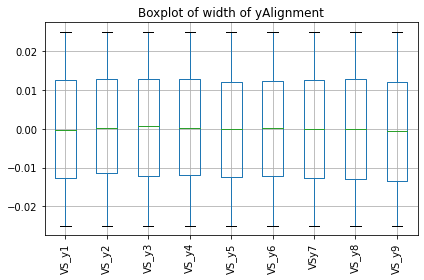

In [18]:
# Make a dataframe of yAlignment of each parameters
df_width_yAlignment = df_original.drop(columns=['Model','t_L1','t_D12','t_L2','t_R2','t_Core','Dia_1','Dia_2','Dia_3','Dia_4','Dia_5','Dia_6','Dia_7','Dia_8','Dia_9','VS_x1','VS_x2','VS_x3','VS_x4','VS_x5','VS_x6','VS_x7','VS_x8','VS_x9','Resistance'])

# make figures
df_width_yAlignment.boxplot(rot=90)
plt.title("Boxplot of width of yAlignment")
plt.tight_layout()

thickness of Resistance

    - it has outlier
    
    - a bit long range of upper side

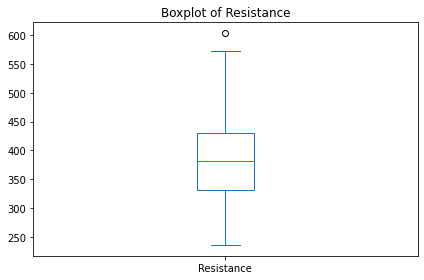

In [19]:
# Make a dataframe of Resistance
df_Resistance= df_original['Resistance']

# make figures
df_Resistance.plot(kind='box') # the way how to make figure of seriese type
plt.title("Boxplot of Resistance")
plt.tight_layout()

Next,

    check histogram
    
    >>> input datas/parameters were made by using random fanction and deciding min and max
    
    >>> because of random input datas, don't need to visualize them
    
    >>> ECDF  < https://en.wikipedia.org/wiki/File:ECDF-100.png >
    
Tips,

    when i use histogram and compare to each figures I should utilize same number of bins

In [20]:
#sns.set()
#sns.pairplot(df_original,size=4)

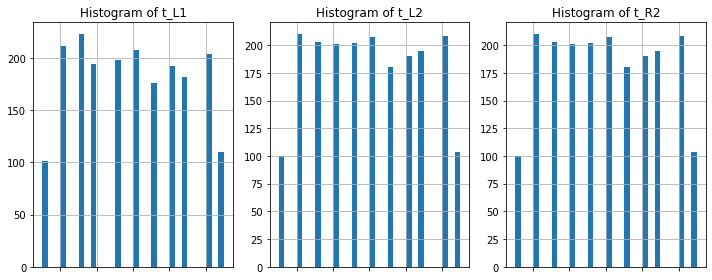

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_thickness_copperlayer.columns),figsize=(10,4))

for i, column in enumerate(df_thickness_copperlayer.columns):
    df_thickness_copperlayer.hist(column=column, ax=axes[i], rwidth=0.9, bins=30)
    axes[i].set_title(f"Histogram of {column}") # put titles for each figue
    axes[i].set_xticklabels([]) # Hide x-axis labels 
plt.tight_layout()

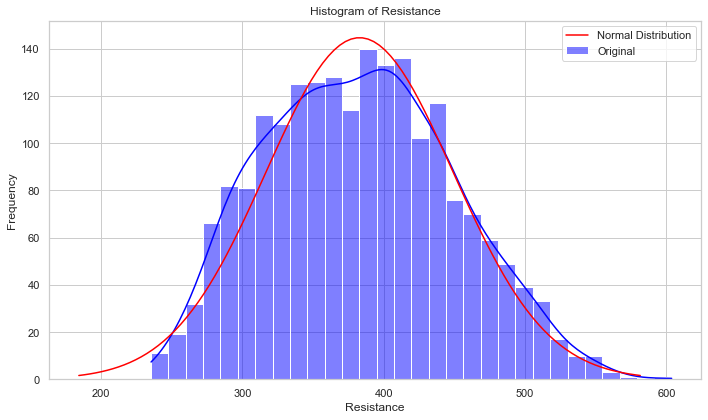

In [22]:
# Original Histogram and Normal Distribution
# ------------------------------------------
mu,sigma = np.mean(df_original['Resistance']), np.std(df_original['Resistance'])
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
pdf = norm.pdf(x,mu,sigma)

sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
sns.histplot(df_original['Resistance'],bins=30,kde=True,color='blue',label='Original')
plt.plot(x,pdf*24000,color='red',label='Normal Distribution')
plt.title("Histogram of Resistance")
plt.xlabel('Resistance')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()

The way to investigate how close is the dataframe from normal distribution

    skewness : How much a distribution deviates from a normal distribution
    kurtosis : How much a distribution leptokurtic from a normal distribution

In [23]:
skewness = df_original['Resistance'].skew()
kurt = df_original['Resistance'].kurtosis()

print("skewness :", skewness)
print("kurtosis :", kurt)

skewness : 0.19223409253565304
kurtosis : -0.5449896373255143


Finally,

    check All Correlation Coefficient

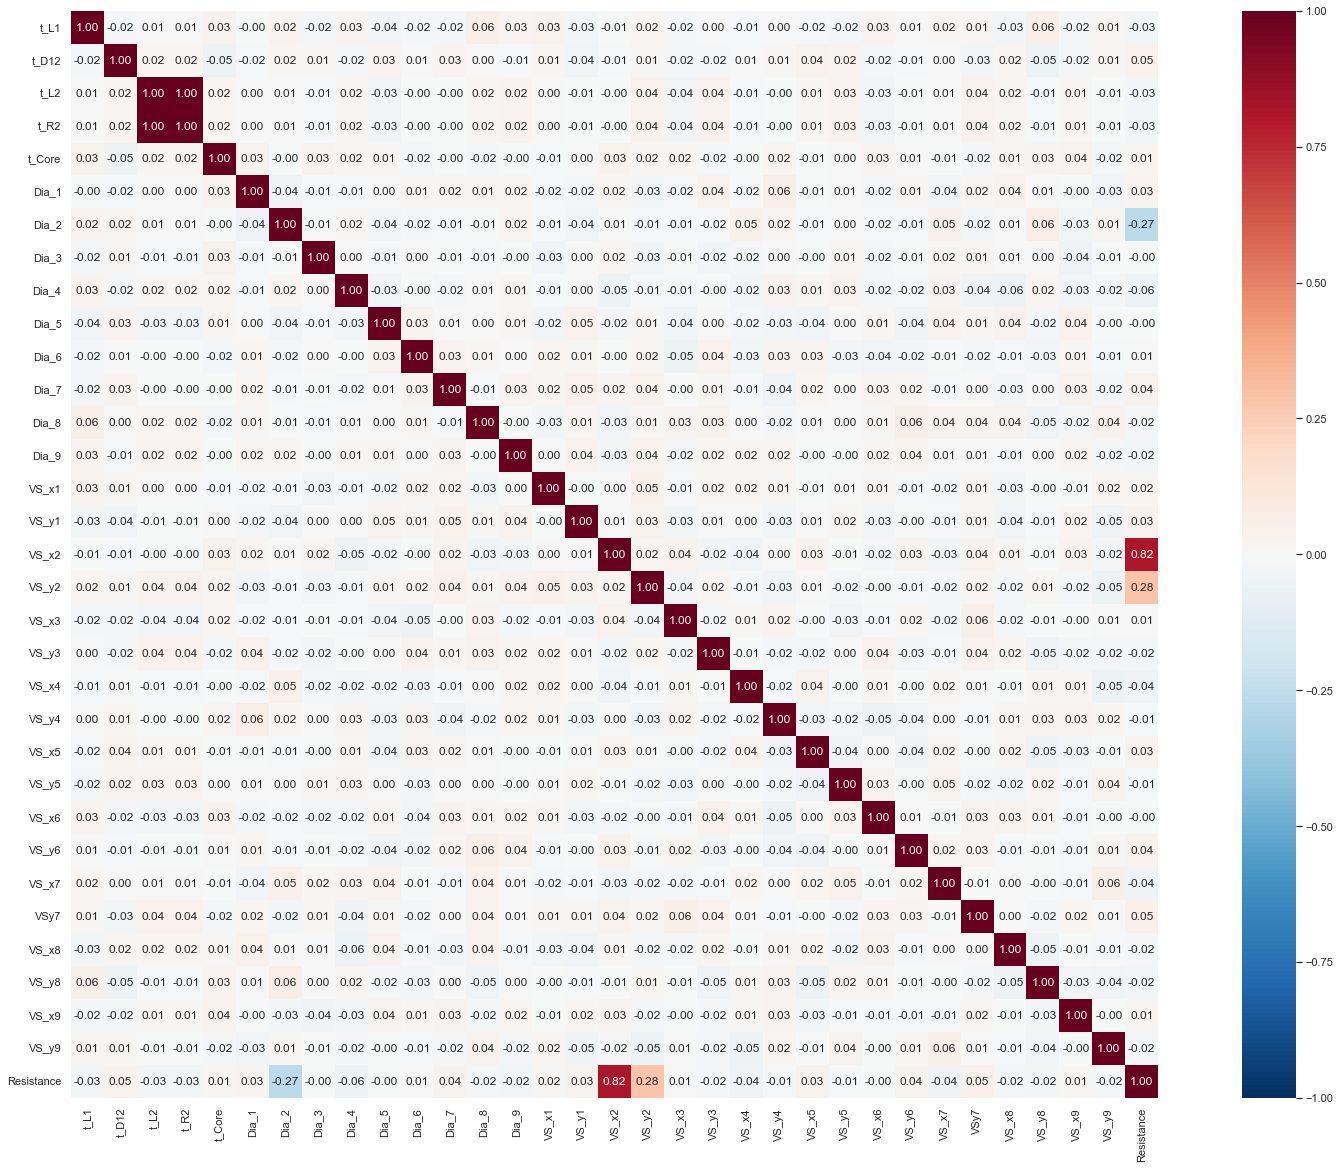

In [24]:
# without Model name (Object)
df_without_model = df_original.drop('Model',axis=1)

corrmat = df_without_model.corr()

f, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corrmat, cmap='RdBu_r',annot=True,fmt='.2f',vmax=1,vmin=-1,square=True);

    - check correlaton between other parameters and Resistance
    
        - high correlation over 0.1 :  'Dia_2', 'VS_x2', 'VS_y2'

In [25]:
correlation = df_without_model.corr()['Resistance']
#print(correlation)

# over 0.1 absolution of correlation
high_correlation_1 = correlation[np.abs(correlation) >= 0.1].index.tolist()
print('high correlation over 0.1 : ', high_correlation_1)

high correlation over 0.1 :  ['Dia_2', 'VS_x2', 'VS_y2', 'Resistance']


### Preprocessing

At first,

    make a new data frame which we utilize (Features and Target Valiable)

In [26]:
df = df_original.drop(columns=['Model','t_L1','t_D12','t_L2','t_R2','t_Core','Dia_1','Dia_3','Dia_4','Dia_5','Dia_6','Dia_7','Dia_8','Dia_9','VS_x1','VS_x3','VS_x4','VS_x5','VS_x6','VS_x7','VS_x8','VS_x9','VS_y1','VS_y3','VS_y4','VS_y5','VS_y6','VSy7','VS_y8','VS_y9'])
df.describe()

,Dia_2,VS_x2,VS_y2,Resistance
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.095472,0.000020,0.000590,382.855133
std,0.002910,0.014500,0.014137,66.225571
min,0.090500,-0.025000,-0.025000,235.349740
25%,0.093000,-0.012500,-0.011325,331.937435
50%,0.095500,0.000100,0.000150,382.041324
75%,0.098000,0.012325,0.012900,430.008603
max,0.100500,0.025000,0.025000,603.692019


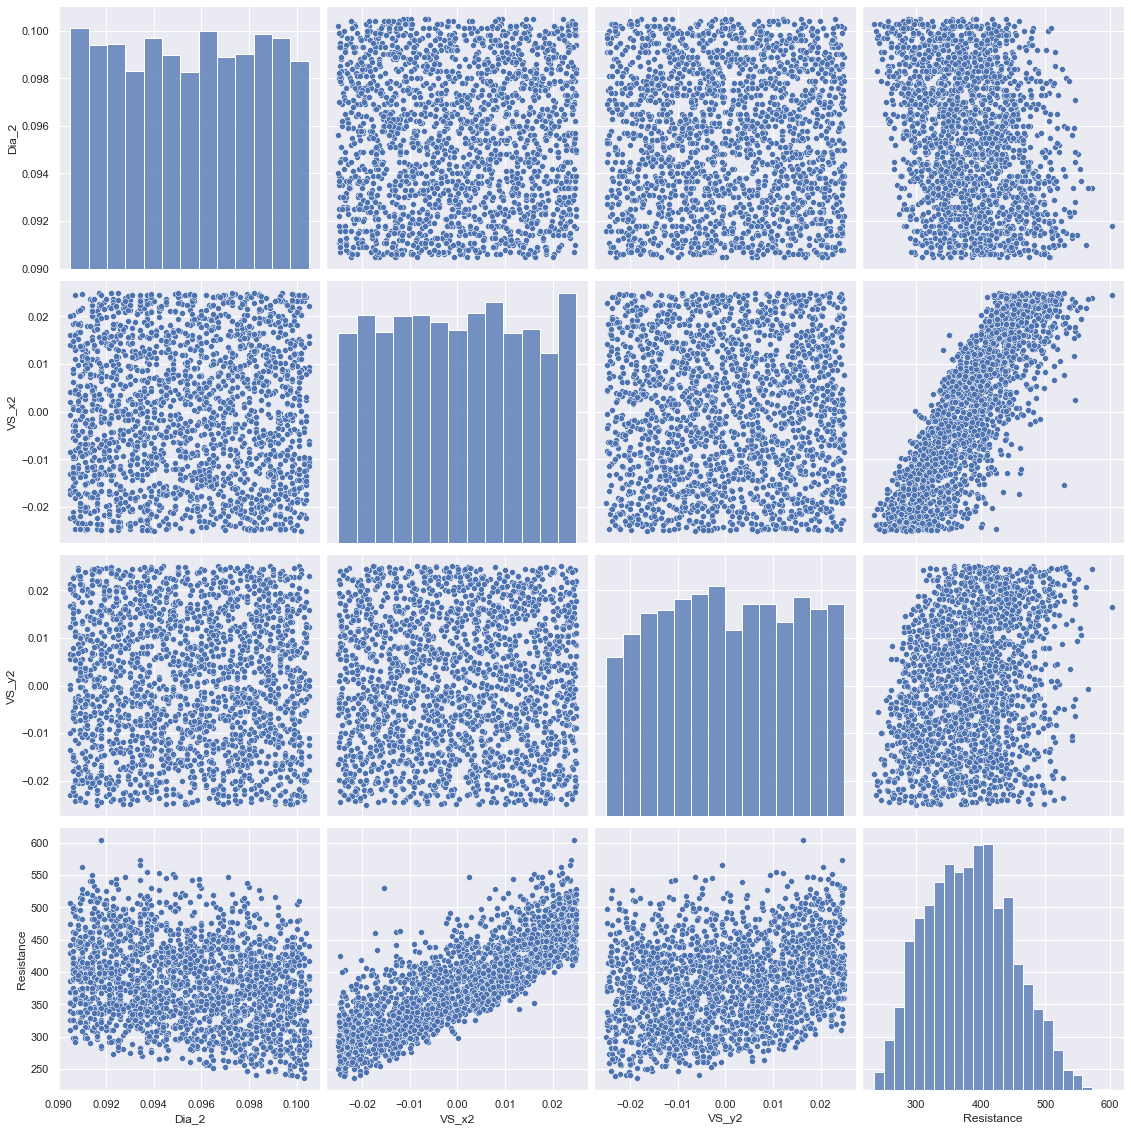

In [27]:
sns.set()
sns.pairplot(df,size=4)

In [28]:
x_df = df.drop(columns=["Resistance"])
y_df = df.drop(columns=['Dia_2', 'VS_x2', 'VS_y2']) # y_df=df['Resistance'] will be Series

From the features value, normalize features

    > The features have small difference gap between the features value range
    > CP cannot distinguish between the meaninglessness of each size difference
    > Scaling using MinMaxScaling(Normalization)

In [29]:
# Normalize Features
# -------------------
scaler = MinMaxScaler()
normx_df_data = scaler.fit_transform(x_df)
normx_df = pd.DataFrame(normx_df_data, columns=['Dia_2', 'VS_x2', 'VS_y2'])

normx_df.describe()

,Dia_2,VS_x2,VS_y2
count,2000.000000,2000.000000,2000.000000
mean,0.497195,0.500399,0.511800
std,0.290989,0.290003,0.282743
min,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.273500
50%,0.500000,0.502000,0.503000
75%,0.750000,0.746500,0.758000
max,1.000000,1.000000,1.000000


From the target value, search which transformation is close to a normal distribution

    > Normalization : Scaling Min-Max so don't change shapes 
    > Standardization : μ=0, σ=1
    > Logarithmic transformation : Take the logarithm
    > Box-Cox Transformation : can only use pulus values
    > Square Root Transformation : Take the square root

In [30]:
# Accumulator of Skewness and Kurtosis
# -------------------------------------
skewness = []
kurt = []

# Original
# ---------------
skewness.append(df_original['Resistance'].skew())
kurt.append(df_original['Resistance'].kurtosis())

# Normalization
# ---------------
scaler = MinMaxScaler()
norm_df_data = scaler.fit_transform(y_df)
norm_df = pd.DataFrame(norm_df_data, columns=['Norm Resistance'])

skewness.append(norm_df['Norm Resistance'].skew())
kurt.append(norm_df['Norm Resistance'].kurtosis())

# Standardization
# ---------------
scaler = StandardScaler()
std_df_data = scaler.fit_transform(y_df)
std_df = pd.DataFrame(std_df_data, columns=['Std Resistance'])

skewness.append(std_df['Std Resistance'].skew())
kurt.append(std_df['Std Resistance'].kurtosis())

# Logarithmic transformation
# ----------------------------
log_data = np.log(y_df)
log_df = pd.DataFrame(log_data.values, columns=['Log Resistance'])

skewness.append(log_df['Log Resistance'].skew())
kurt.append(log_df['Log Resistance'].kurtosis())

# Box-Cox Transformation
# ----------------------------
boxcox_data, lambda_param = stats.boxcox(df['Resistance']) # Data must be 1-dimensional
boxcox_df = pd.DataFrame(boxcox_data, columns=['Box-Cox Resistance'])

skewness.append(boxcox_df['Box-Cox Resistance'].skew())
kurt.append(boxcox_df['Box-Cox Resistance'].kurtosis())

# Square Root Transformation
# ----------------------------
sqrtroot_data = np.sqrt(y_df)
sqrtroot_df = pd.DataFrame(sqrtroot_data.values, columns=['Sqrt Root Resistance'])

skewness.append(sqrtroot_df['Sqrt Root Resistance'].skew())
kurt.append(sqrtroot_df['Sqrt Root Resistance'].kurtosis())

Visualization using Histogram

Text(0.5, 0, '')

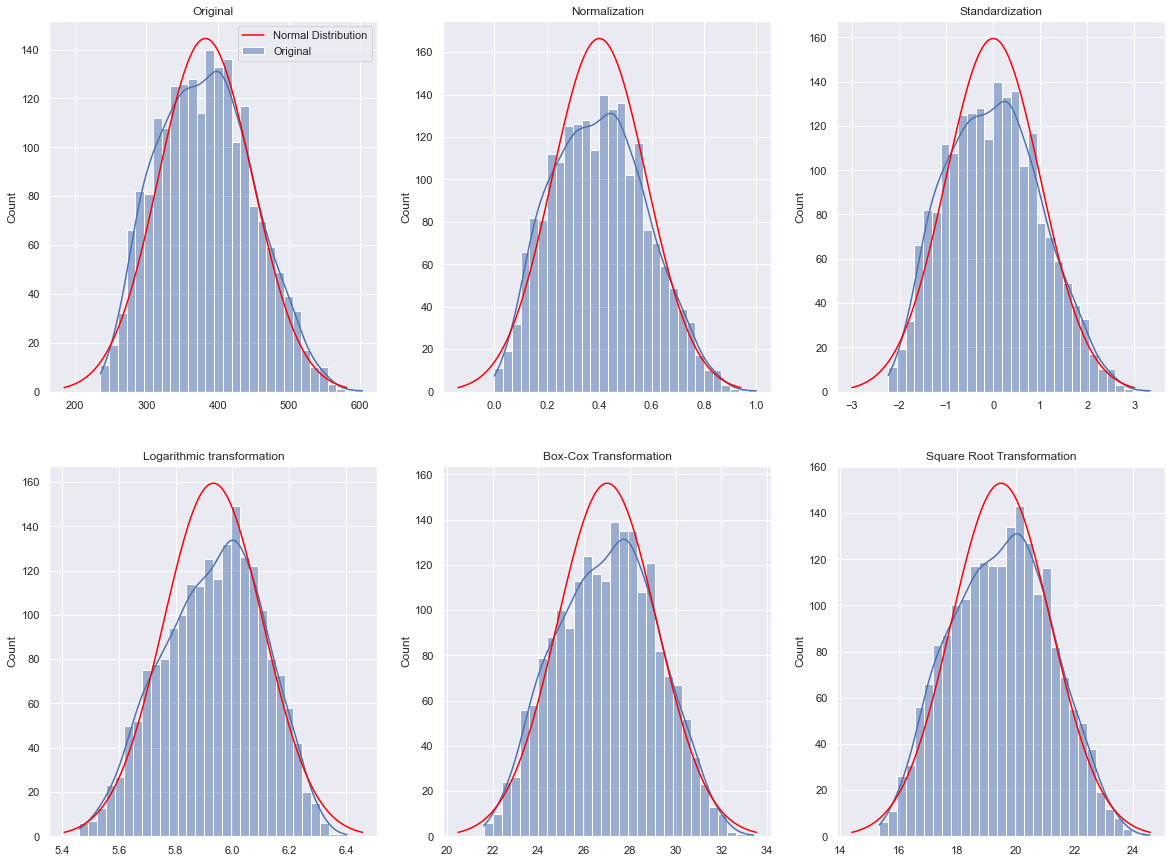

In [31]:
# Plot and Conpare to each Histogram
# ----------------------------------
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

sns.histplot(df_original['Resistance'],bins=30,kde=True,ax=axes[0,0],label='Original')
mu,sigma = np.mean(df_original['Resistance']), np.std(df_original['Resistance'])
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
pdf = norm.pdf(x,mu,sigma)
axes[0,0].plot(x,pdf*24000,color='red',label='Normal Distribution')
axes[0,0].set_title('Original')
axes[0,0].set_xlabel('')
axes[0,0].legend(loc='upper right')

sns.histplot(norm_df['Norm Resistance'],bins=30,kde=True,ax=axes[0,1],label='Normalization')
mu,sigma = np.mean(norm_df['Norm Resistance']), np.std(norm_df['Norm Resistance'])
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
pdf = norm.pdf(x,mu,sigma)
axes[0,1].plot(x,pdf*75,color='red',label='Normal Distribution')
axes[0,1].set_title('Normalization')
axes[0,1].set_xlabel('')

sns.histplot(std_df['Std Resistance'],bins=30,kde=True,ax=axes[0,2],label='Standardization')
mu,sigma = np.mean(std_df['Std Resistance']), np.std(std_df['Std Resistance'])
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
pdf = norm.pdf(x,mu,sigma)
axes[0,2].plot(x,pdf*400,color='red',label='Normal Distribution')
axes[0,2].set_title('Standardization')
axes[0,2].set_xlabel('')

sns.histplot(log_df['Log Resistance'],bins=30,kde=True,ax=axes[1,0],label='Logarithmic')
mu,sigma = np.mean(log_df['Log Resistance']), np.std(log_df['Log Resistance'])
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
pdf = norm.pdf(x,mu,sigma)
axes[1,0].plot(x,pdf*70,color='red',label='Normal Distribution')
axes[1,0].set_title('Logarithmic transformation')
axes[1,0].set_xlabel('')

sns.histplot(boxcox_df['Box-Cox Resistance'],bins=30,kde=True,ax=axes[1,1],label='Box-Cox')
mu,sigma = np.mean(boxcox_df['Box-Cox Resistance']), np.std(boxcox_df['Box-Cox Resistance'])
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
pdf = norm.pdf(x,mu,sigma)
axes[1,1].plot(x,pdf*850,color='red',label='Normal Distribution')
axes[1,1].set_title('Box-Cox Transformation')
axes[1,1].set_xlabel('')

sns.histplot(sqrtroot_df['Sqrt Root Resistance'],bins=30,kde=True,ax=axes[1,2],label='Square Root')
mu,sigma = np.mean(sqrtroot_df['Sqrt Root Resistance']), np.std(sqrtroot_df['Sqrt Root Resistance'])
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
pdf = norm.pdf(x,mu,sigma)
axes[1,2].plot(x,pdf*650,color='red',label='Normal Distribution')
axes[1,2].set_title('Square Root Transformation')
axes[1,2].set_xlabel('')

table of Skewness and Kurtosis

In [32]:
# Compile into a table of Skewness and Kurtosis
# ----------------------------------------------

skew_df = pd.DataFrame(list([skewness]),columns=['Original','Normalization','Standardization','Logarithmic transformation','Box-Cox Transformation','Square Root Transformation'])
kurt_df = pd.DataFrame(list([kurt]),columns=['Original','Normalization','Standardization','Logarithmic transformation','Box-Cox Transformation','Square Root Transformation'])

skew_kurt_df = pd.DataFrame([skewness,kurt],columns=['Original','Normalization','Standardization','Logarithmic transformation','Box-Cox Transformation','Square Root Transformation'])
skew_kurt_df

,Original,Normalization,Standardization,Logarithmic transformation,Box-Cox Transformation,Square Root Transformation
0,0.192234,0.192234,0.192234,-0.168985,-0.015623,0.011436
1,-0.544990,-0.544990,-0.544990,-0.595894,-0.620022,-0.617274


Due to Histograms and a table of Skewness and Kurtosis,

    > in this time to use Square Root Transformation for Resistance

In [33]:
# Target Valures
# --------------
sqrtrooty_df = sqrtroot_df['Sqrt Root Resistance']

split the data set into train and test

    > Features - normalization
    > Target values - Square Root Transformation

In [34]:
x_train, x_test, y_train, y_test = train_test_split(normx_df, sqrtrooty_df, test_size=0.25, random_state=42)

#print(x_train.shape) #(1500, 3)
#print(x_test.shape) #(500, 3)
#print(y_train.shape) #(1500,)
#print(y_test.shape) #(500,)

### Modeling

Try modeling using following methods:

    > Non Tree Model
        > Single Linear Regression
        > Multiple Regression
        > kNN : k-Nearest Neighbors
        > SVR : Support Vector Regression
        > MLP : Multi-Layer-Percrptron
        
    > Tree Model
        > Decision Tree
        > Random Forest
        > Gradient Boosting


Non Tree Model

In [35]:
# Single Linear Regression
# ------------------------
sl_model = LinearRegression()

sl_normx_df = normx_df.drop(columns=['Dia_2', 'VS_y2'])
xsl_train, xsl_test, ysl_train, ysl_test = train_test_split(sl_normx_df, sqrtrooty_df, test_size=0.25, random_state=42)

sl_model.fit(xsl_train, ysl_train)

y_pred = sl_model.predict(xsl_test)

sl_mse = MSE(ysl_test, y_pred)
sl_mae = MAE(ysl_test, y_pred)
sl_r2 = r2_score(ysl_test, y_pred)

print("")
print("Evaluation")
print(f'MSE(Mean Squared Error) : {sl_mse}')
print(f'R2 Score : {sl_r2*100} %')


Evaluation
MSE(Mean Squared Error) : 1.0462200038614664
R2 Score : 67.47266435645783 %



Evaluation
MSE(Mean Squared Error) : 0.5807708098137729
R2 Score : 81.9436380559917 %


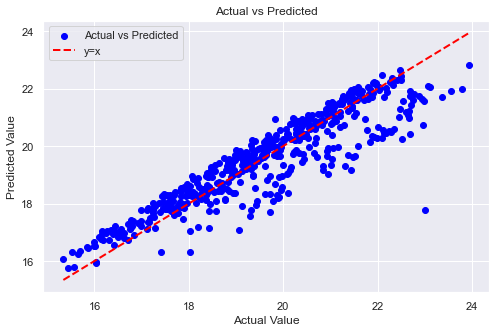

In [36]:
# Multiple Regression
# --------------------
ml_model = LinearRegression()

ml_model.fit(x_train, y_train)

y_pred = ml_model.predict(x_test)

ml_mse = MSE(y_test, y_pred)
ml_mae = MAE(y_test, y_pred)
ml_r2 = r2_score(y_test, y_pred)

print("")
print("Evaluation")
print(f'MSE(Mean Squared Error) : {ml_mse}')
print(f'R2 Score : {ml_r2*100} %')

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], linestyle='--',color='red',linewidth=2,label='y=x')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()

Text(0, 0.5, 'Coeffiscient')

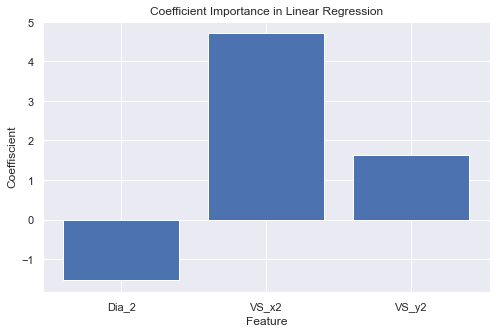

In [37]:
coef = ml_model.coef_
feature_names = ['Dia_2', 'VS_x2', 'VS_y2']

plt.figure(figsize=(8,5))
plt.bar(feature_names, coef)
plt.title('Coefficient Importance in Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Coeffiscient')

In [38]:
# kNN (k-Nearest Neighbors)
# ----------------------------
knn_model = KNeighborsRegressor()

# Optimize Hyper Parameters (Grid Search)
param_grid = {
    'n_neighbors':[2,10,15,30],
    'weights':['uniform','distance']
}
grid_search = GridSearchCV(knn_model, param_grid, cv=5) 
grid_search.fit(x_train, y_train)

print('Optimized Param')
print('n_neighbors :', grid_search.best_params_['n_neighbors'])
print('weights :', grid_search.best_params_['weights'])

knn_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'], weights= grid_search.best_params_['weights'])

knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

knn_mse = MSE(y_test, y_pred)
knn_mae = MAE(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)

print("")
print("Evaluation")
print(f'MSE(Mean Squared Error) : {knn_mse}')
print(f'R2 Score : {knn_r2*100} %')

# calculate SHAP
# ---------------
'''
explainer = shap.Explainer(knn_model)
shap_values = explainer(x_test)
shap.plots.waterfall(shap_values[0])
'''

Optimized Param
n_neighbors : 30
weights : distance

Evaluation
MSE(Mean Squared Error) : 0.5630326455636743
R2 Score : 82.4951236136504 %


'\nexplainer = shap.Explainer(knn_model)\nshap_values = explainer(x_test)\nshap.plots.waterfall(shap_values[0])\n'

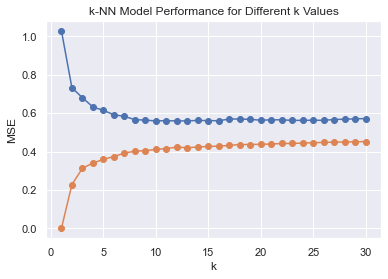

In [39]:
# Figure of Results
k_values = range(1, 31)
mse_scores_test =[]
mse_scores_train =[]

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    mse_train = MSE(y_train, y_pred_train)
    mse_test = MSE(y_test, y_pred_test)
    mse_scores_train.append(mse_train)
    mse_scores_test.append(mse_test)

plt.plot(k_values,mse_scores_test,marker='o')
plt.plot(k_values,mse_scores_train,marker='o')
plt.title('k-NN Model Performance for Different k Values')
plt.xlabel('k')
plt.ylabel('MSE')
plt.grid(True)

In [40]:
# SVR (Support Vector Regression)
# -------------------------------
svr_model = SVR()

# Optimize Hyper Parameters (Grid Search)
param_grid = {
    'kernel':['linear','poly','rbf'],
    'C':[0.1, 1, 3, 10],
    'gamma':['scale','auto']
}
grid_search = GridSearchCV(svr_model, param_grid, cv=5) 
grid_search.fit(x_train, y_train)

print('Optimized Param')

print('kernel :', grid_search.best_params_['kernel'])
print('C :', grid_search.best_params_['C'])
print('gamma :', grid_search.best_params_['gamma'])

svr_model = SVR(kernel=grid_search.best_params_['kernel'],C=grid_search.best_params_['C'],gamma=grid_search.best_params_['gamma'])

svr_model.fit(x_train,y_train)

y_pred = svr_model.predict(x_test)

svr_mse = MSE(y_test, y_pred)
svr_mae = MAE(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

print("")
print("Evaluation")
print(f'MSE(Mean Squared Error) : {svr_mse}')
print(f'R2 Score : {svr_r2*100} %')

# calculate SHAP
# ---------------
'''
explainer = shap.Explainer(svr_model)
shap_values = explainer(x_test)
shap.plots.waterfall(shap_values[0])
'''

Optimized Param
kernel : rbf
C : 3
gamma : auto

Evaluation
MSE(Mean Squared Error) : 0.5925644378911711
R2 Score : 81.57697014913393 %


'\nexplainer = shap.Explainer(svr_model)\nshap_values = explainer(x_test)\nshap.plots.waterfall(shap_values[0])\n'

In [41]:
# MLP (Multi-Layer-Percrptron)
# ----------------------------

# Optimize Hyper Parameters (Grid Search)
param_grid = {
    'hidden_layer_sizes':[(100,),(100,100),(100,100,100),(100,100,100,100)],
    'activation':['relu','tanh','leaky_relu','sigmoid'],
    'learning_rate_init':[0.001,0.01,0.1]
}
model=MLPRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5) 
grid_search.fit(x_train, y_train)

print('Optimized Param')
print('best_model :', grid_search.best_estimator_)
print('best_params :', grid_search.best_params_)

Optimized Param
best_model : MLPRegressor(hidden_layer_sizes=(100, 100, 100))
best_params : {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate_init': 0.001}


In [42]:
'''
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)
    print(-grid.best_params_)
    print(-grid.best_estimator_)
    
    return best_score
'''
# Activation Function
def relu(x):
    return np.maximum(0,x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha*x,x)

def sigmoid(x):
    return 1/(1+np.exp(-x))

# Data preparation
#x_train = x_train.values
#x_test = x_test.values
#y_train = y_train.values
#y_test = y_test.values

# Regression Model
class MLP_regressor():
    '''
    Data Structure : [Input-Layer, Layer-1, Layer-2, Layer-3, Output-Layer]
    Number of Nodes : [3, 100, 100, 100, 1]
    
    ※ if it will do overfitting, reduce number of Nodes and number of Layer
    '''
    
    def __init__(self):
        '''
        Constructor : init method
        
        Definition of Params (weight): 
        
            > 1) Input-Layer_Layer-1  : self.w1: [ 3, 100] , Random (μ=0,σ=0.1)
            > 2) Layer-1_Layer-2      : self.w2: [100, 100] , Random (μ=0,σ=0.1)
            > 3) Layer-2_Layer-3      : self.w3: [100, 100] , Random (μ=0,σ=0.1)
            > 4) Layer-3_Output-Layer : self.w4: [100,  1] , Random (μ=0,σ=0.1)
        
        Definition of Params (bias): 
            
            > 1) Input-Layer_Layer-1  : self.b1: [100] , 0
            > 2) Layer-1_Layer-2      : self.b2: [100] , 0
            > 3) Layer-2_Layer-3      : self.b3: [100] , 0
            > 4) Layer-3_Output-Layer : self.b4: [ 1] , 0
        '''
        # Params (weight)
        self.w1 = np.random.randn(3,100) * 0.1
        self.w2 = np.random.randn(100,100) * 0.1
        self.w3 = np.random.randn(100,100) * 0.1
        self.w4 = np.random.randn(100,1) * 0.1
        
        # Params (bias)
        self.b1 = np.zeros(100, dtype=float)
        self.b2 = np.zeros(100, dtype=float)
        self.b3 = np.zeros(100, dtype=float)
        self.b4 = np.zeros(1, dtype=float)
    
    def forward(self, x):
        '''
        Forward Propagation
        
        Explanations :
        
            > Input        : x = [N,3] 
            > Input-Layer  : self.layer0 = [N,3]
            > Layer-1      : self.layer1 = [N,100]
            > Layer-2      : self.layer2 = [N,100]
            > Layer-3      : self.layer3 = [N,100]
            > Output-Layer : self.out = [N,1]
        '''
        self.layer0 = x
        self.layer1 = relu(np.dot(self.layer0, self.w1) + self.b1)
        self.layer2 = relu(np.dot(self.layer1, self.w2) + self.b2)
        self.layer3 = relu(np.dot(self.layer2, self.w3) + self.b3)
        self.out = np.dot(self.layer3, self.w4) + self.b4
        
        return self.out

    def backward(self, x, y):
        '''
        Back Propagation
        
        Explanations :
        
            > True Values       : t = [N,1]
            > Predicted Values  : y = [N,1] 
            
            > Output-Layer Error : delta4 = [N,1]
            > Layer-3 Error      : delta3 = [N,100]
            > Layer-2 Error      : delta2 = [N,100]
            > Layer-1 Error      : delta1 = [N,100]
            
            > Output-Layer bias gradient : dedb4 = [N,1]
            > Layer-3 bias gradient      : dedb3 = [N,100]
            > Layer-2 bias gradient      : dedb2 = [N,100]
            > Layer-1 bias gradient      : dedb1 = [N,100]
            
            > Output-Layer weight gradient : dedw1 = [N,100,1]
            > Layer-3 weight gradient      : dedw1 = [N,100,100]
            > Layer-2 weight gradient      : dedw1 = [N,100,100]
            > Layer-1 weight gradient      : dedw1 = [N,3,100]
        '''
        #delta4 = -2 * (y_train - y)
        delta4 = -2 * (y_train.values.reshape(-1,1) - y)
        delta3 = np.dot(delta4, self.w4.transpose())
        delta2 = np.dot(delta3*np.where(self.layer3 > 0,1.,0.), self.w3.transpose())
        delta1 = np.dot(delta2*np.where(self.layer2 > 0,1.,0.), self.w2.transpose())
        
        self.dedb4 = np.mean(delta4, axis=0)
        self.dedb3 = np.mean(delta3*(self.layer3 > 0), axis=0)
        self.dedb2 = np.mean(delta2*(self.layer2 > 0), axis=0)
        self.dedb1 = np.mean(delta1*(self.layer1 > 0), axis=0)
        
        self.dedw4 = np.dot(self.layer3.T, delta4) / delta4.shape[0]
        self.dedw3 = np.dot(self.layer2.T, delta3*(self.layer3 > 0)) / delta4.shape[0]
        self.dedw2 = np.dot(self.layer1.T, delta2*(self.layer2 > 0)) / delta4.shape[0]
        self.dedw1 = np.dot(self.layer0.T, delta1*(self.layer1 > 0)) / delta4.shape[0]
        
    def optimize_GradientDecent(self,lr):
        '''
        updating parameters
        '''
        self.w1 -= lr * self.dedw1
        self.w2 -= lr * self.dedw2
        self.w3 -= lr * self.dedw3
        self.w4 -= lr * self.dedw4
        
        self.b1 -= lr * self.dedb1
        self.b2 -= lr * self.dedb2
        self.b3 -= lr * self.dedb3
        self.b4 -= lr * self.dedb4                          
        

Epoch 1 (train Loss) 381.1301780740104 (test Loss) 382.91856948846856
Epoch 2 (train Loss) 378.0588777229317 (test Loss) 379.92437365206854
Epoch 3 (train Loss) 375.0747998199811 (test Loss) 376.9056130170803
Epoch 4 (train Loss) 372.06911561373124 (test Loss) 373.81751875507376
Epoch 5 (train Loss) 368.9996911550538 (test Loss) 370.6299428420259
Epoch 6 (train Loss) 365.83262442371705 (test Loss) 367.30160693877554
Epoch 7 (train Loss) 362.52581137568677 (test Loss) 363.79484694592503
Epoch 8 (train Loss) 359.0416371086515 (test Loss) 360.0709575427515
Epoch 9 (train Loss) 355.34437639872607 (test Loss) 356.0812835643503
Epoch 10 (train Loss) 351.3828160993983 (test Loss) 351.7552854270079
Epoch 11 (train Loss) 347.0877362060088 (test Loss) 347.0027301463195
Epoch 12 (train Loss) 342.37091137029967 (test Loss) 341.72017677765245
Epoch 13 (train Loss) 337.12795623445385 (test Loss) 335.7850541158897
Epoch 14 (train Loss) 331.2385759571655 (test Loss) 329.0442137645531
Epoch 15 (train L

Epoch 118 (train Loss) 1.5970808967048058 (test Loss) 1.8132303820051865
Epoch 119 (train Loss) 1.5838190225867093 (test Loss) 1.7989241417787911
Epoch 120 (train Loss) 1.5707141079643163 (test Loss) 1.7847839723206296
Epoch 121 (train Loss) 1.557764079573042 (test Loss) 1.7708074436465895
Epoch 122 (train Loss) 1.5449663448682864 (test Loss) 1.7569937972989413
Epoch 123 (train Loss) 1.5323201517455054 (test Loss) 1.743341537150027
Epoch 124 (train Loss) 1.5198243604133002 (test Loss) 1.7298496417706364
Epoch 125 (train Loss) 1.5074792333803866 (test Loss) 1.7165138231039168
Epoch 126 (train Loss) 1.4952826005586026 (test Loss) 1.7033335797997768
Epoch 127 (train Loss) 1.4832308470067885 (test Loss) 1.6903036679080619
Epoch 128 (train Loss) 1.471323083058073 (test Loss) 1.6774237579971563
Epoch 129 (train Loss) 1.4595569909529653 (test Loss) 1.6646950337015798
Epoch 130 (train Loss) 1.4479325350478942 (test Loss) 1.652114911324341
Epoch 131 (train Loss) 1.4364477979886605 (test Loss) 1

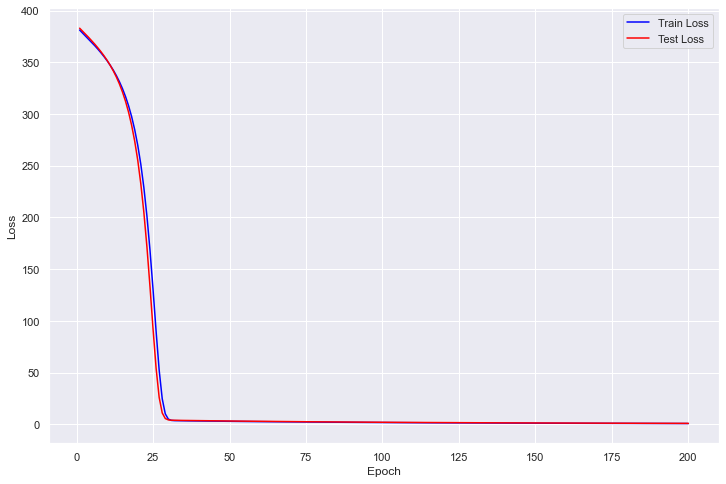

In [43]:
# Decision of Model
mlp_model = MLP_regressor()

# Learning rate
lr = 0.001
# Iteration
n_epoch = 200

train_losses = []
test_losses = []

for n in range(n_epoch):
    y = mlp_model.forward(x_train)
    train_loss = MSE(y_train, y)
    mlp_model.backward(y_train, y)
    mlp_model.optimize_GradientDecent(lr)
    train_losses.append(train_loss)
    
    y = mlp_model.forward(x_test)
    test_loss = MSE(y_test, y)
    test_loss_mae = MAE(y_test, y)
    test_losses.append(test_loss)
    r2 = r2_score(y_test, y)
    
    print('Epoch', n+1, '(train Loss)', train_loss, '(test Loss)', test_loss)

plt.figure(figsize=(12,8))
plt.plot(range(1,n_epoch+1),train_losses,color='blue',label='Train Loss')
plt.plot(range(1,n_epoch+1),test_losses,color='red',label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

print("")
print("Evaluation")
print(f'MSE(Mean Squared Error) : {test_loss}')
print(f'R2 Score : {r2*100} %')

Tree Model


Evaluation
MSE(Mean Squared Error) : 1.0448575892607337
R2 Score : 67.51502228962687 %


Text(0, 0.5, 'Importances')

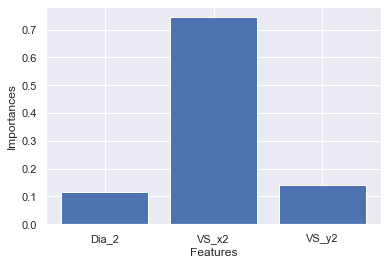

In [44]:
# Decision Tree
# --------------
tree_model = DecisionTreeRegressor()

tree_model.fit(x_train,y_train)

y_pred = tree_model.predict(x_test)

tree_mse = MSE(y_test, y_pred)
tree_mae = MAE(y_test, y_pred)
tree_r2 = r2_score(y_test, y_pred)

print("")
print("Evaluation")
print(f'MSE(Mean Squared Error) : {tree_mse}')
print(f'R2 Score : {tree_r2*100} %')

feature_importances = tree_model.feature_importances_

plt.bar(['Dia_2', 'VS_x2', 'VS_y2'], feature_importances)
plt.xlabel("Features")
plt.ylabel("Importances")


Evaluation
MSE(Mean Squared Error) : 0.6068899466742899
R2 Score : 81.1315852102748 %


Text(0, 0.5, 'Importances')

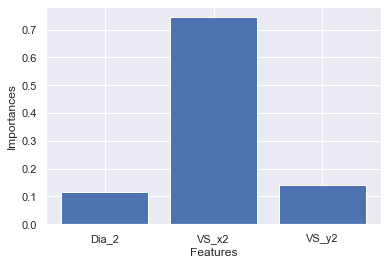

In [45]:
# Random Forest
# -------------
rf_model = RandomForestRegressor(n_estimators=100,max_depth=None, random_state=42)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

rf_mse = MSE(y_test, y_pred)
rf_mae = MAE(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print("")
print("Evaluation")
print(f'MSE(Mean Squared Error) : {rf_mse}')
print(f'R2 Score : {rf_r2*100} %')

feature_importances = rf_model.feature_importances_

plt.bar(['Dia_2', 'VS_x2', 'VS_y2'], feature_importances)
plt.xlabel("Features")
plt.ylabel("Importances")


Evaluation
MSE(Mean Squared Error) : 0.5609838660786095
R2 Score : 82.55882086444312 %


Text(0, 0.5, 'Importances')

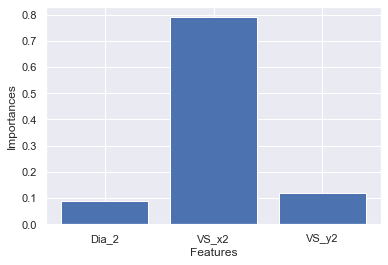

In [46]:
# Gradient Boosting
# ------------------
gb_model = GradientBoostingRegressor()

gb_model.fit(x_train,y_train)

y_pred = gb_model.predict(x_test)

gb_mse = MSE(y_test, y_pred)
gb_mae = MAE(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)

print("")
print("Evaluation")
print(f'MSE(Mean Squared Error) : {gb_mse}')
print(f'R2 Score : {gb_r2*100} %')

feature_importances = gb_model.feature_importances_

plt.bar(['Dia_2', 'VS_x2', 'VS_y2'], feature_importances)
plt.xlabel("Features")
plt.ylabel("Importances")

summary of results

In [52]:
# Accumulator of MSE, MAE and R2 Score
# -------------------------------------
mse = []
mae = []
r2 = []

# Single Linear Regression
# -------------------------
mse.append(sl_mse)
mae.append(sl_mae)
r2.append(sl_r2)

# Multiple Regression
# --------------------
mse.append(ml_mse)
mae.append(ml_mae)
r2.append(ml_r2)

# kNN : k-Nearest Neighbors
# -------------------------
mse.append(knn_mse)
mae.append(knn_mae)
r2.append(knn_r2)

# SVR : Support Vector Regression
# -------------------------------
mse.append(svr_mse)
mae.append(svr_mae)
r2.append(svr_r2)

# MLP : Multi-Layer-Percrptron
# ----------------------------
mse.append(test_loss)
mae.append(test_loss_mae)
r2.append(r2[-1])

# Decision Tree
# --------------
mse.append(tree_mse)
mae.append(tree_mae)
r2.append(tree_r2)

# Random Forest
# -------------
mse.append(rf_mse)
mae.append(rf_mae)
r2.append(rf_r2)

# Gradient Boosting
# -----------------
mse.append(gb_mse)
mae.append(gb_mae)
r2.append(gb_r2)

# Compile into a table of MSE, MAE and R2 Score
# ----------------------------------------------
mse_df = pd.DataFrame(list([mse]),columns=['Single Linear Regression','Multiple Regression','kNN','SVR','MLP','Decision Tree','Random Forest','Gradient Boosting'])
mae_df = pd.DataFrame(list([mae]),columns=['Single Linear Regression','Multiple Regression','kNN','SVR','MLP','Decision Tree','Random Forest','Gradient Boosting'])
r2_df = pd.DataFrame(list([r2]),columns=['Single Linear Regression','Multiple Regression','kNN','SVR','MLP','Decision Tree','Random Forest','Gradient Boosting'])

mse_mae_r2_df = pd.DataFrame([mse,mae,r2],columns=['Single Linear Regression','Multiple Regression','kNN','SVR','MLP','Decision Tree','Random Forest','Gradient Boosting'])
mse_mae_r2_df = mse_mae_r2_df.transpose()
mse_mae_r2_df.columns = ['mse','mae','r2']
mse_mae_r2_df

,mse,mae,r2
Single Linear Regression,1.046220,0.819577,0.674727
Multiple Regression,0.580771,0.549269,0.819436
kNN,0.563033,0.539983,0.824951
SVR,0.592564,0.494334,0.815770
MLP,1.050870,0.791460,0.815770
Decision Tree,1.044858,0.741343,0.675150
Random Forest,0.606890,0.569168,0.811316
Gradient Boosting,0.560984,0.535124,0.825588


Using Stacking, execute emsemble lerning

    > Stacking : Use a input data which is outputs from some models 
    
    > meta_preds : Linear Regression

In [48]:
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=15, weights= "uniform")
model3 = MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=200)
model4 = GradientBoostingRegressor()

preds = np.zeros((x_train.shape[0], 4))

kf = KFold(n_splits=5)
for train_index, val_index in kf.split(x_train):
    model1.fit(x_train.values[train_index], y_train.values[train_index])
    model2.fit(x_train.values[train_index], y_train.values[train_index])
    model3.fit(x_train.values[train_index], y_train.values[train_index])
    model4.fit(x_train.values[train_index], y_train.values[train_index])
    
    preds[val_index, 0] = model1.predict(x_train.values[val_index])
    preds[val_index, 1] = model2.predict(x_train.values[val_index])
    preds[val_index, 2] = model3.predict(x_train.values[val_index])
    preds[val_index, 3] = model4.predict(x_train.values[val_index])
    
meta_model = LinearRegression()
meta_model.fit(preds,y_train)

test_preds = np.column_stack((model1.predict(x_test),model2.predict(x_test),model3.predict(x_test),model4.predict(x_test)))
final_predictions = meta_model.predict(test_preds)

mse = MSE(y_test, final_predictions)                                                
r2 = r2_score(y_test, final_predictions)

print("")
print("Evaluation")
print(f'MSE(Mean Squared Error) : {mse}')
print(f'R2 Score : {r2*100} %')


Evaluation
MSE(Mean Squared Error) : 0.5340465536088546
R2 Score : 83.39631106803773 %


### Estimate the distribution of resistance

Range of Input Data

    Diameters: mean 0.095 std: 0.009
    Offsets (VS): mean 0 std: 0.025
    t_L1: mean 0.028 std: 0.0003
    t_D12: mean 0.06 std: 0.0015
    t_L&R2: mean 0.016 std: 0.0003
    t_Core: mean 0.05 std: 0.0015

Make a input data 

In [56]:
samples = 1000

#Diameters: mean 0.095 std: 0.009
# --------------------------------
dia_mean = 0.095
dia_std = 0.009
dia_data = np.random.normal(dia_mean, dia_std, samples)

#Offsets (VS): mean 0 std: 0.025
# --------------------------------
vs_mean = 0
vs_std = 0.025
vs_data = np.random.normal(vs_mean, vs_std, samples)
"""
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(vs_data,bins=30,kde=True,color='blue',label='Normal Distribution')
plt.xlabel('Resistance')
plt.ylabel('Frequency')
plt.tight_layout()
"""
#t_L1: mean 0.028 std: 0.0003
# --------------------------------
t_L1_mean = 0
t_L1_std = 0.025
t_L1_data = np.random.normal(t_L1_mean, t_L1_std, samples)

#t_D12: mean 0.06 std: 0.0015
# --------------------------------
t_D12_mean = 0
t_D12_std = 0.025
t_D12_data = np.random.normal(t_D12_mean, t_D12_std, samples)

#t_L&R2: mean 0.016 std: 0.0003
# --------------------------------
t_LR2_mean = 0
t_LR2_std = 0.025
t_LR2_data = np.random.normal(t_LR2_mean, t_LR2_std, samples)

#t_Core: mean 0.05 std: 0.0015
# --------------------------------
t_Core_mean = 0
t_Core_std = 0.025
t_Core_data = np.random.normal(t_Core_mean, t_Core_std, samples)

Text(0.5, 0, '')

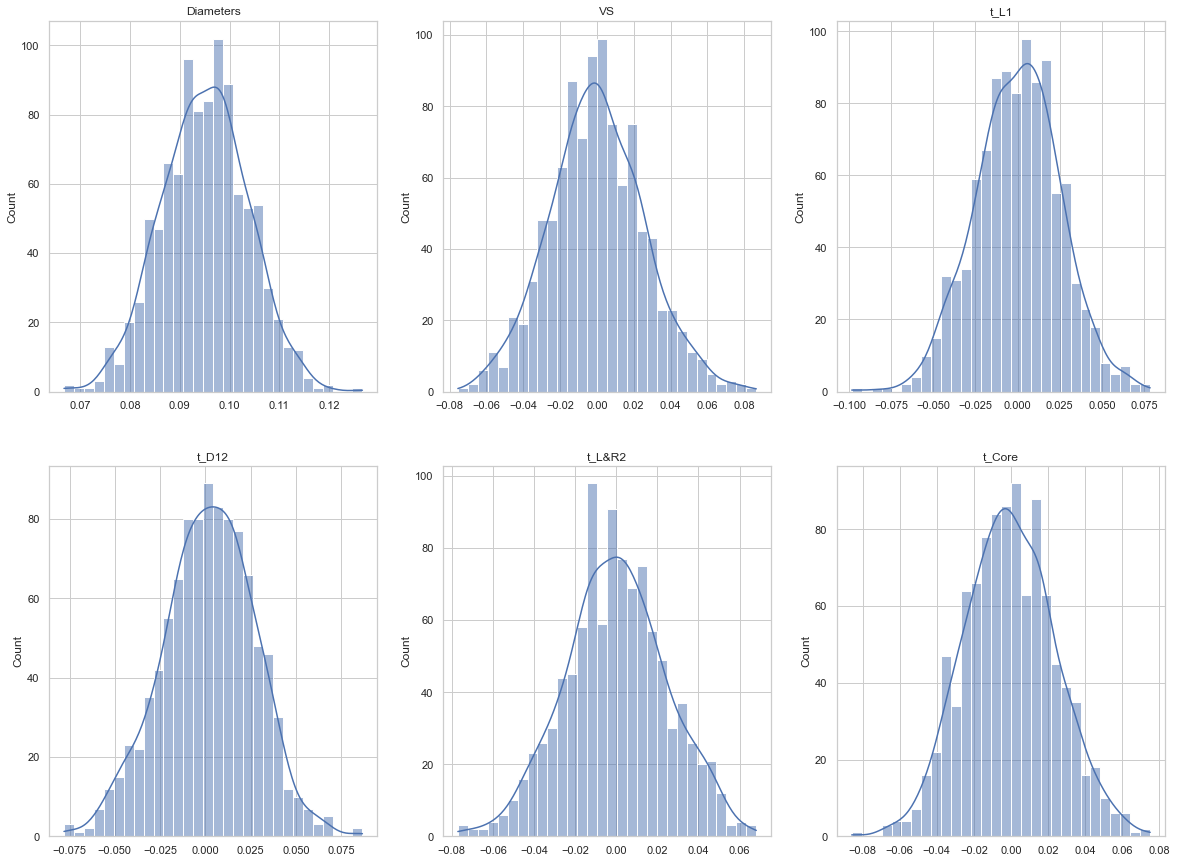

In [59]:
# Plot and Conpare to each Histogram
# ----------------------------------
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

sns.histplot(dia_data,bins=30,kde=True,ax=axes[0,0],label='Diameters')
axes[0,0].set_title('Diameters')
axes[0,0].set_xlabel('')

sns.histplot(vs_data,bins=30,kde=True,ax=axes[0,1],label='VS')
axes[0,1].set_title('VS')
axes[0,1].set_xlabel('')

sns.histplot(t_L1_data,bins=30,kde=True,ax=axes[0,2],label='t_L1')
axes[0,2].set_title('t_L1')
axes[0,2].set_xlabel('')

sns.histplot(t_D12_data,bins=30,kde=True,ax=axes[1,0],label='t_D12')
axes[1,0].set_title('t_D12')
axes[1,0].set_xlabel('')

sns.histplot(t_LR2_data,bins=30,kde=True,ax=axes[1,1],label='t_L&R2')
axes[1,1].set_title('t_L&R2')
axes[1,1].set_xlabel('')

sns.histplot(t_Core_data,bins=30,kde=True,ax=axes[1,2],label='t_Core')
axes[1,2].set_title('t_Core')
axes[1,2].set_xlabel('')

###  >> Monte Carlo Method

In [152]:
x_test

,Dia_2,VS_x2,VS_y2
1860,0.27,0.530,0.272
353,0.44,0.918,0.360
1333,0.12,0.242,0.814
905,0.31,0.078,0.922
1289,0.04,0.928,0.656
...,...,...,...
765,0.75,0.010,0.612
1356,0.41,0.804,0.230
408,0.85,0.578,0.980
1614,0.17,0.816,0.354


minimum
monte_carlo_results_min: 16.663415477997166
maximum
monte_carlo_results_max: 17.52731154731399


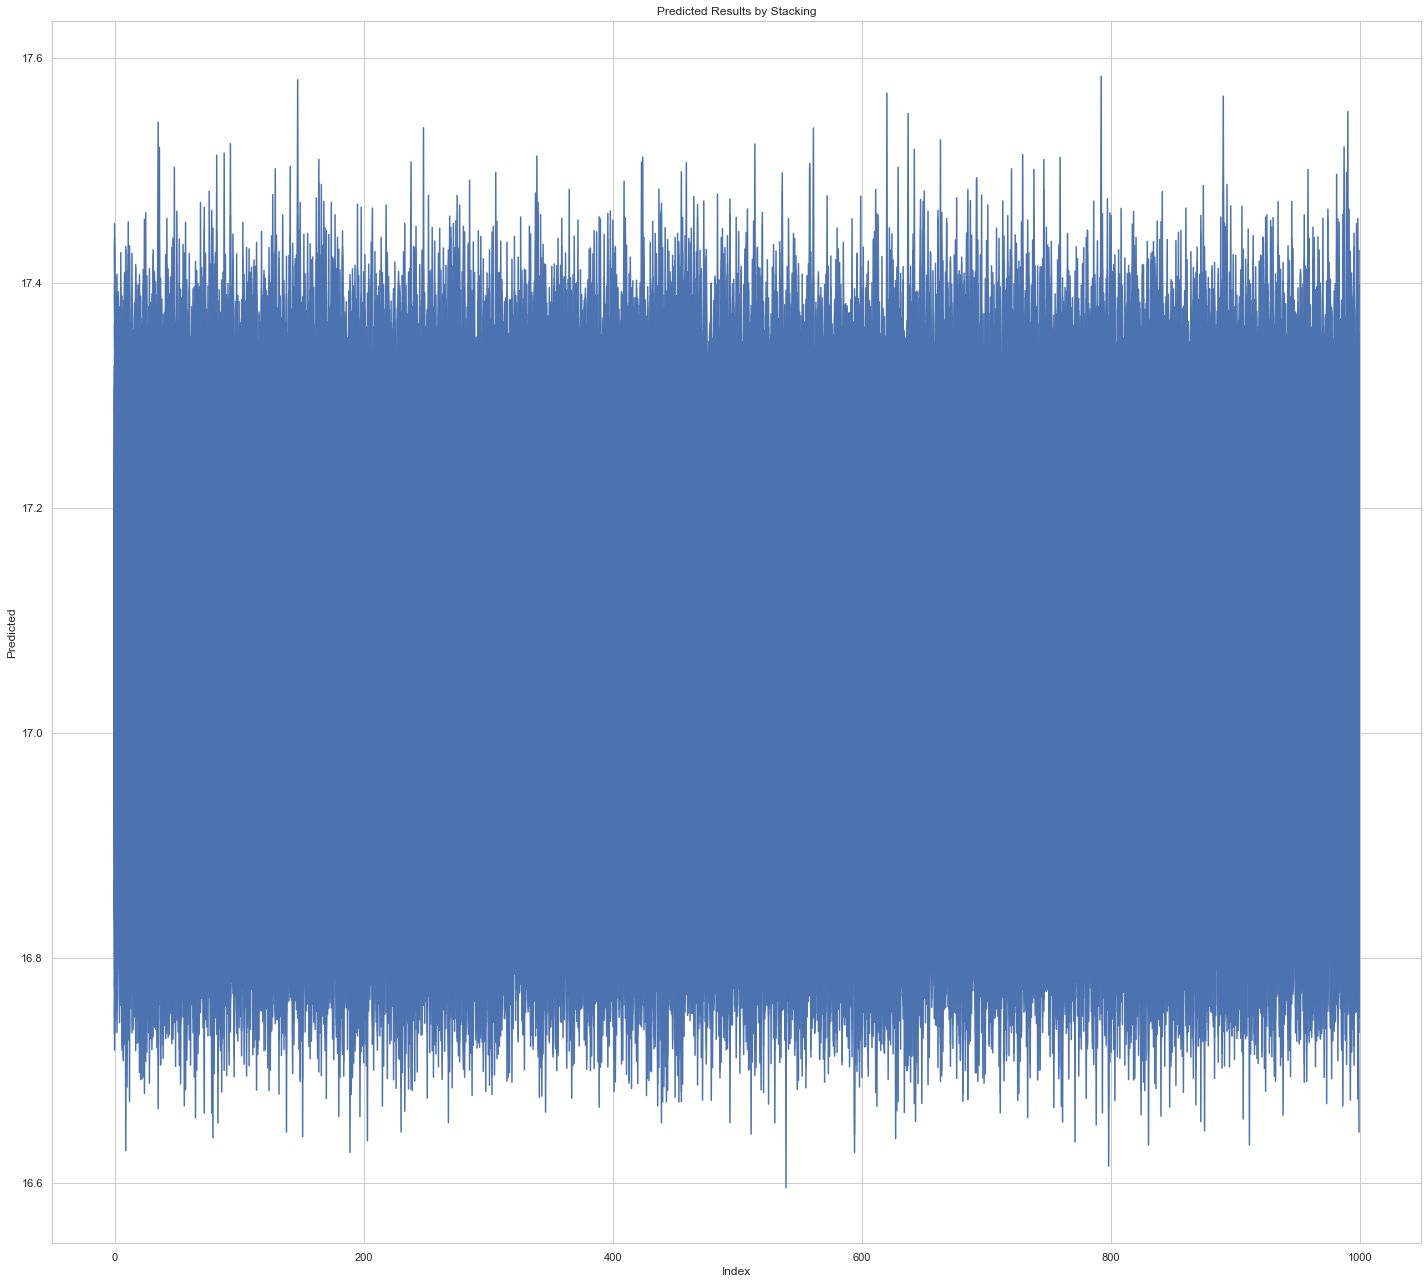

In [167]:
# Monte Carlo Method
# -------------------

# predict using Monte Carlo Method
num_simulations = 1000
monte_carlo_predictions = []

for _ in range(num_simulations):
    monte_carlo_data1 = np.random.normal(dia_mean, dia_std, samples)
    monte_carlo_data2 = np.random.normal(vs_mean, vs_std, samples)
    monte_carlo_data3 = np.random.normal(vs_mean, vs_std, samples)
    monte_carlo_input = {'Dia_2': monte_carlo_data1, 'VS_x2': monte_carlo_data2, 'VS_y2': monte_carlo_data3}
    df_monte_carlo_input = pd.DataFrame(monte_carlo_input)
    test_preds = np.column_stack((model1.predict(df_monte_carlo_input),model2.predict(df_monte_carlo_input),model3.predict(df_monte_carlo_input),model4.predict(df_monte_carlo_input)))
    prediction = meta_model.predict(test_preds)
    monte_carlo_predictions.append(prediction)
monte_carlo_predictions = np.array(monte_carlo_predictions)

# obrain min-max prediction results
monte_carlo_results_min = monte_carlo_predictions.min()
monte_carlo_results_max = monte_carlo_predictions.max()

# obtain index
monte_carlo_results_min_index = np.argmin(monte_carlo_predictions)
monte_carlo_results_max_index = np.argmax(monte_carlo_predictions)

# obrain paramas of min-max prediction results
#monte_carlo_paramas_min = test_preds[monte_carlo_results_min_index]
#monte_carlo_paramas_max = test_preds[monte_carlo_results_max_index]

#print(monte_carlo_paramas_max)

print('minimum')
#print('target_input_min:',target_input_min)
print('monte_carlo_results_min:',experiment_results_min)
print('maximum')
#print('target_input_max:',target_input_max)
print('monte_carlo_results_max:',experiment_results_max)

# visualization
sns.set(style='whitegrid')
plt.figure(figsize=(20,18))
indices = range(len(monte_carlo_predictions))
plt.plot(indices, monte_carlo_predictions, linestyle='-',color='b')
plt.xlabel('Index')
plt.ylabel('Predicted')
plt.title('Predicted Results by Stacking')
plt.tight_layout()

###   >> Full Factorial Design

Experiments to predict for models

minimum
target_input_min: [0.12668666 0.00056933 0.00056933]
experiment_results_min: 16.76181320076357
maximum
target_input_max: [0.08999898 0.07337223 0.05682611]
experiment_results_max: 18.850201799258187


Text(0.5, 1.0, 'Predicted Results by Random Forest')

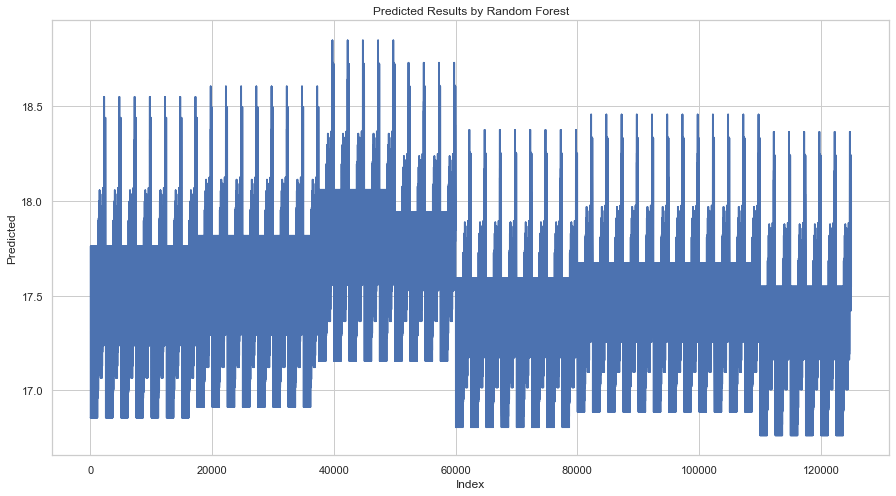

In [141]:
# Full Factorial Design
# ---------------------

# Factor Levels
min_dia_date = np.min(dia_data)
max_dia_date = np.max(dia_data)
factor_diameters_levels = np.linspace(min_dia_date, max_dia_date, num=50).tolist()

min_vs_data = np.min(vs_data)
max_vs_data = np.max(vs_data)
factor_offsets_levels_x = np.linspace(min_vs_data, max_vs_data, num=50).tolist()
factor_offsets_levels_y = np.linspace(min_vs_data, max_vs_data, num=50).tolist()

factor_combinations = list(itertools.product(factor_diameters_levels,factor_offsets_levels_x,factor_offsets_levels_y))
# need same column names between making model one
df_combination = pd.DataFrame(factor_combinations, columns=['Dia_2','VS_x2','VS_y2']) # Same shape like df between x_train,test

experiment_results = gb_model.predict(df_combination)

experiment_results_min = experiment_results.min()
experiment_results_max = experiment_results.max()

# Dictionary
result_input_mapping = {result:data for result, data in zip(experiment_results,df_combination.values)}

target_input_min = result_input_mapping[experiment_results_min]
target_input_max = result_input_mapping[experiment_results_max]

print('minimum')
print('target_input_min:',target_input_min)
print('experiment_results_min:',experiment_results_min)
print('maximum')
print('target_input_max:',target_input_max)
print('experiment_results_max:',experiment_results_max)

# visualization
sns.set(style='whitegrid')
plt.figure(figsize=(15,8))
indices = range(len(experiment_results))
plt.plot(indices, experiment_results, linestyle='-',color='b')
plt.xlabel('Index')
plt.ylabel('Predicted')
plt.title('Predicted Results by Random Forest')

minimum
target_input_min: [ 0.12424081 -0.07554279 -0.07554279]
experiment_results_min: 16.663415477997166
maximum
target_input_max: [0.06676345 0.08660912 0.08660912]
experiment_results_max: 17.52731154731399


Text(0.5, 1.0, 'Predicted Results by Stacking')

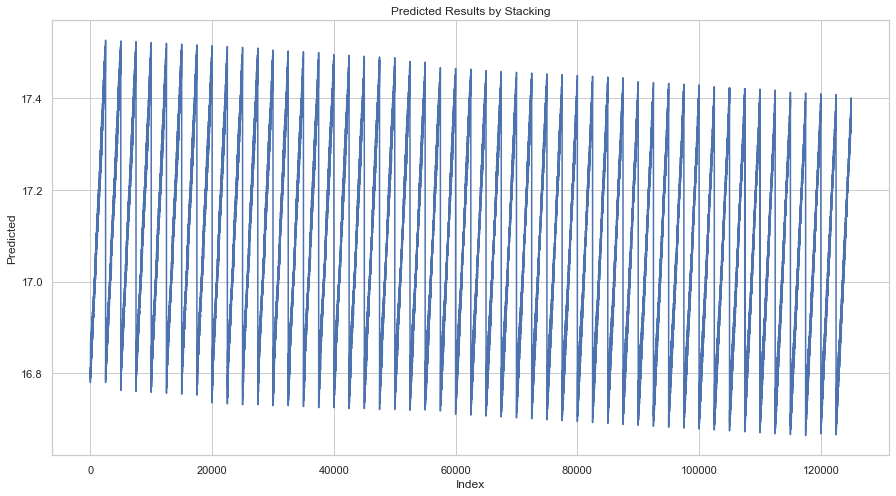

In [142]:
# Full Factorial Design
# ---------------------

# Factor Levels
min_dia_date = np.min(dia_data)
max_dia_date = np.max(dia_data)
factor_diameters_levels = np.linspace(min_dia_date, max_dia_date, num=50).tolist()

min_vs_data = np.min(vs_data)
max_vs_data = np.max(vs_data)
factor_offsets_levels_x = np.linspace(min_vs_data, max_vs_data, num=50).tolist()
factor_offsets_levels_y = np.linspace(min_vs_data, max_vs_data, num=50).tolist()

factor_combinations = list(itertools.product(factor_diameters_levels,factor_offsets_levels_x,factor_offsets_levels_y))
# need same column names between making model one
df_combination = pd.DataFrame(factor_combinations, columns=['Dia_2','VS_x2','VS_y2']) # Same shape like df between x_train,test

#experiment_results = gb_model.predict(df_combination)

test_preds = np.column_stack((model1.predict(df_combination),model2.predict(df_combination),model3.predict(df_combination),model4.predict(df_combination)))
experiment_results = meta_model.predict(test_preds)

experiment_results_min = experiment_results.min()
experiment_results_max = experiment_results.max()

# Dictionary
result_input_mapping = {result:data for result, data in zip(experiment_results,df_combination.values)}

target_input_min = result_input_mapping[experiment_results_min]
target_input_max = result_input_mapping[experiment_results_max]

print('minimum')
print('target_input_min:',target_input_min)
print('experiment_results_min:',experiment_results_min)
print('maximum')
print('target_input_max:',target_input_max)
print('experiment_results_max:',experiment_results_max)

# visualization
sns.set(style='whitegrid')
plt.figure(figsize=(15,8))
indices = range(len(experiment_results))
plt.plot(indices, experiment_results, linestyle='-',color='b')
plt.xlabel('Index')
plt.ylabel('Predicted')
plt.title('Predicted Results by Stacking')

In [116]:
df_combination = pd.DataFrame(factor_combinations, columns=['Dia_2','VS_x2','VS_y2'])

df_combination

,Dia_2,VS_x2,VS_y2
0,0.066763,-0.075543,-0.075543
1,0.066763,-0.075543,-0.057526
2,0.066763,-0.075543,-0.039509
3,0.066763,-0.075543,-0.021492
4,0.066763,-0.075543,-0.003475
...,...,...,...
995,0.126687,0.086609,0.014542
996,0.126687,0.086609,0.032558
997,0.126687,0.086609,0.050575
998,0.126687,0.086609,0.068592


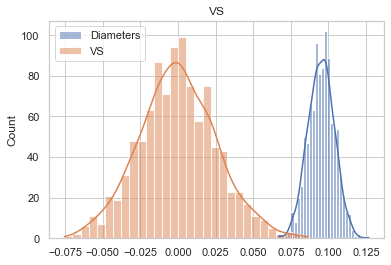

In [131]:
sns.histplot(dia_data,bins=30,kde=True,label='Diameters')
plt.title('Diameters')
plt.xlabel('')

sns.histplot(vs_data,bins=30,kde=True,label='VS')
plt.title('VS')
plt.xlabel('')
plt.legend()

In [135]:
import os
current_directory = os.getcwd()
current_directory

'C:\\Users\\ueno'